# Relatório de análise VIII

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

In [3]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


<AxesSubplot:>

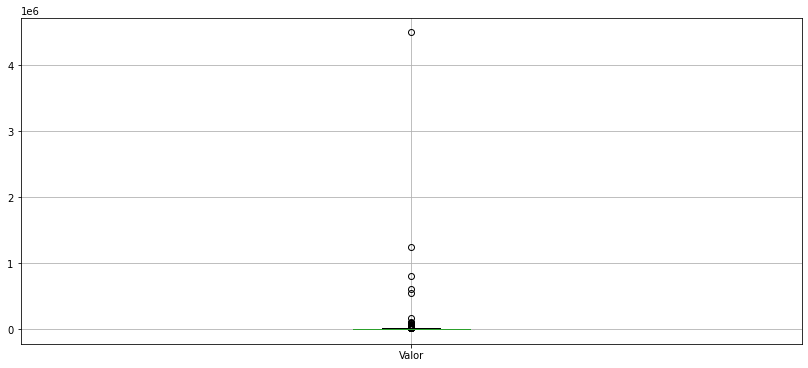

In [4]:
dados.boxplot(['Valor'])

## Analisando imoveis de baixo padrão

In [5]:
selecao = dados['Valor'] < 5000
dados_baixo_padrao = dados[selecao]
dados_baixo_padrao

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
...,...,...,...,...,...,...,...,...,...,...,...
21872,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21873,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21874,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21875,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


<AxesSubplot:>

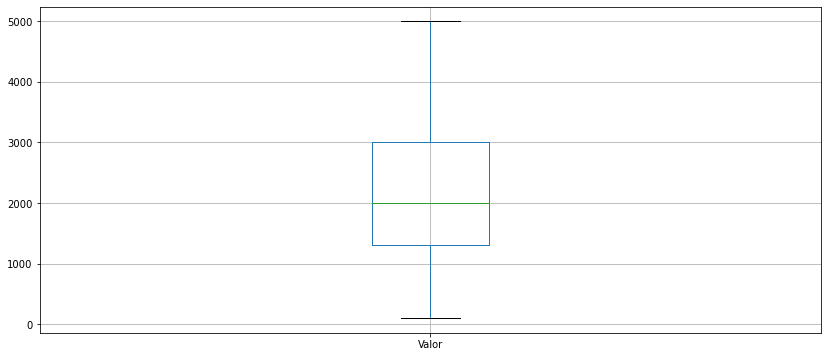

In [14]:
valor_baixo = dados_baixo_padrao['Valor']
dados_baixo_padrao.boxplot(['Valor'])

In [7]:
Q1 = valor_baixo.quantile(.25)
Q3 = valor_baixo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [8]:
selecao = (valor_baixo >= limite_inferior) & (valor_baixo <= limite_superior)

In [9]:
dados_baixo_padrao = dados_baixo_padrao

## Analisando imóveis de medio padrao

In [13]:
selecao = ((dados['Valor'] >= 5000) & (dados['Valor'] < 10000))
dados_medio_padrao = dados[selecao]
dados_medio_padrao


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipo Agregado
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
16,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0,16.09,Casa
19,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,56.00,Apartamento
25,Apartamento,Copacabana,3,0,0,180,5500.0,1780.0,420.0,30.56,Apartamento
31,Apartamento,Copacabana,4,1,0,244,5000.0,2500.0,4100.0,20.49,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21832,Casa,Recreio dos Bandeirantes,4,2,2,352,6500.0,0.0,0.0,18.47,Casa
21839,Apartamento,Ipanema,3,1,1,118,6000.0,980.0,250.0,50.85,Apartamento
21849,Apartamento,Jardim Botânico,3,1,2,145,5000.0,1296.0,317.0,34.48,Apartamento
21855,Casa,Centro,5,0,1,160,5000.0,0.0,80.0,31.25,Casa


<AxesSubplot:>

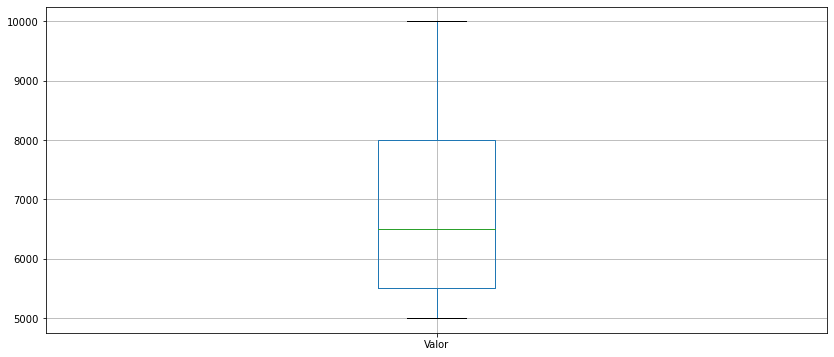

In [17]:
valor_medio = dados_medio_padrao['Valor']
dados_medio_padrao.boxplot(['Valor'])

## Analisando imóveis de alto padrão

In [19]:
selecao = dados['Valor'] > 10000
dados_alto_padrao = dados[selecao]
dados_alto_padrao

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipo Agregado
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento
22,Casa,Campo Grande,4,1,2,400,12000.0,0.0,0.0,30.00,Casa
42,Casa de Condomínio,Barra da Tijuca,5,10,5,1600,25000.0,1600.0,0.0,15.62,Casa
44,Apartamento,Península,4,3,4,267,18000.0,3100.0,400.0,67.42,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21837,Apartamento,Leblon,3,2,1,200,16000.0,4200.0,850.0,80.00,Apartamento
21843,Apartamento,Lagoa,3,3,1,225,12000.0,3756.0,977.0,53.33,Apartamento
21852,Casa de Condomínio,Barra da Tijuca,3,5,3,1000,20000.0,3000.0,0.0,20.00,Casa
21868,Apartamento,Ipanema,3,1,2,150,15000.0,1400.0,600.0,100.00,Apartamento


<AxesSubplot:>

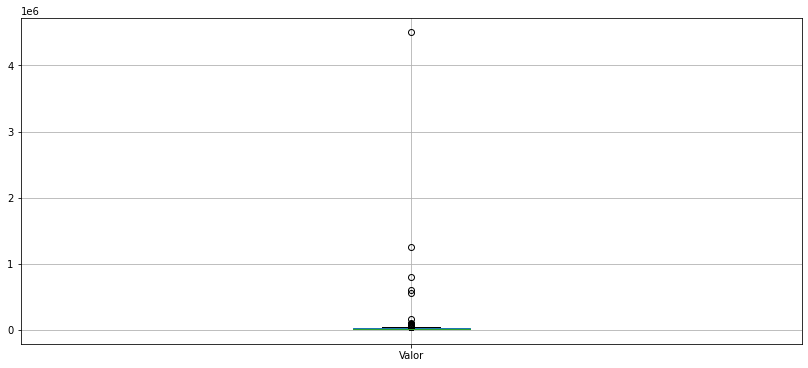

In [22]:
valor_alto = dados_alto_padrao['Valor']
dados_alto_padrao.boxplot(['Valor'])

In [23]:
Q1 = valor_alto.quantile(.25)
Q3 = valor_alto.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [25]:
selecao = (valor_alto >= limite_inferior) & (valor_alto <= limite_superior)
dados_alto_padrao = dados_alto_padrao[selecao]

<AxesSubplot:>

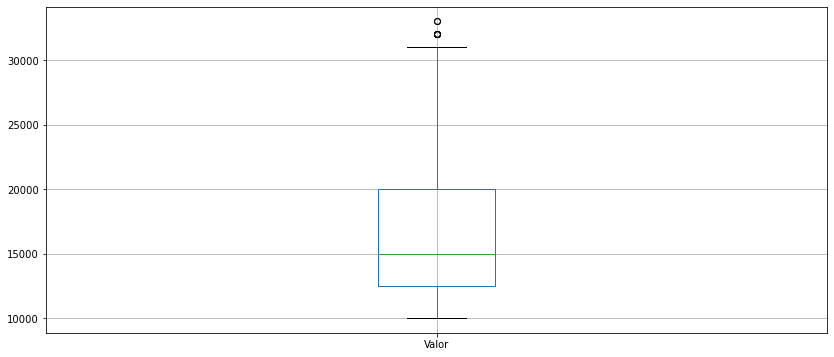

In [26]:
dados_alto_padrao.boxplot(['Valor'])